---
# Import Module
---


In [1]:
# import required packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np
import nltk
import re
from nltk import corpus
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.model_selection import train_test_split
from nltk import wsd
from nltk.corpus import wordnet as wn
nltk.download('stopwords')
nltk.download('wordnet')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import  EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


---
# Data Understanding
Dataset ini berisi informasi blog sebanyak 10467, informasi author blog sebanyak 6868 dan informasi yang memberikan rating blog sebanyak 200140.

untuk file csv terdiri dari 3 file, yaitu:

1. Medium Blog Data
2. Author Data
3. Blog ratings
---

In [2]:
blog_df = pd.read_csv('/content/Medium Blog Data.csv')
author_df = pd.read_csv('/content/Author Data.csv')
ratings_df = pd.read_csv('/content/Blog Ratings.csv')

---
# Univariate Exploratory Data Analysis
variabel - variabel pada dataset ini adalah:

**blog_df**

- blog_id : id unik nama blog
- author_id : id unik penulis blog
- blog_title : judul blog
- blog_content : ringkasan isi blog
- blog_link : link blog
- blog_img : gambar blog
- blog_topic : topik blog yang ditulis.

**author_df**

- author_id : id unik penulis blog
- author_name : nama penulis blog

**ratings_df**

- blog_id : id unik nama blog
- user_id : id pengguna
- ratings : rating yang diberikan oleh pengguna

---

In [3]:
blog_df

,blog_id,author_id,blog_title,blog_content,blog_link,blog_img,topic,scrape_time
0,1,4,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",https://medium.com/@seedifyfund/lets-dominate-...,https://miro.medium.com/fit/c/140/140/1*nByLJr...,ai,2023-02-27 07:37:48
1,3,4,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",https://medium.com/@seedifyfund/lets-dominate-...,https://miro.medium.com/fit/c/140/140/1*nByLJr...,ai,2023-02-27 07:41:47
2,4,7,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,https://medium.com/ux-planet/using-chatgpt-for...,https://miro.medium.com/fit/c/140/140/1*TZSGnN...,ai,2023-02-27 07:41:47
3,5,8,The Automated Stable-Diffusion Checkpoint Merg...,Checkpoint merging is powerful. The power of c...,https://medium.com/@media_97267/the-automated-...,https://miro.medium.com/fit/c/140/140/1*x3N_Hj...,ai,2023-02-27 07:41:47
4,6,9,The Art of Lazy Creativity: My Experience Co-W...,I was feeling particularly lazy one day and co...,https://medium.com/@digitalshedmedia/the-art-o...,https://miro.medium.com/fit/c/140/140/0*m2DdeT...,ai,2023-02-27 07:41:47
...,...,...,...,...,...,...,...,...
10462,10489,6867,Introducing Qwik — A Superfast JavaScript Fram...,An overview of Qwik’s key features and archite...,https://medium.com/gitconnected/introducing-qw...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-05-08 10:36:42
10463,10490,2490,A Beginner’s Guide to Cypress Testing Framewor...,Cypress is a popular JavaScript testing framew...,https://medium.com/itnext/a-beginners-guide-to...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-05-08 10:36:42
10464,10491,6810,How To Use Awaited in TypeScript,Unraveling the magic of Promise handling with ...,https://medium.com/totally-typescript/how-to-u...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-05-08 10:36:42
10465,10492,6868,Angular Hydration? WTF is it and why does it m...,How thirsty is your app for better performance...,https://medium.com/@PurpleGreenLemon/angular-h...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-05-08 10:36:42


In [4]:
author_df

,author_id,author_name
0,1,yaksh
1,2,XIT
2,3,Daniel Meyer
3,4,Seedify Fund
4,5,Ifedolapo Shiloh Olotu
...,...,...
6863,6864,Fresh Frontend Links
6864,6865,Mukesh buwade
6865,6866,Osei Owusu
6866,6867,Yasas Sandeepa


In [5]:
ratings_df

,blog_id,userId,ratings
0,9025,11,3.5
1,9320,11,5.0
2,9246,11,3.5
3,9431,11,5.0
4,875,11,2.0
...,...,...,...
200135,6714,22,5.0
200136,6576,22,3.5
200137,6222,22,3.5
200138,6015,22,2.0


---
## Blog Variabel

Deskripsi blog variabel

---

In [6]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10467 entries, 0 to 10466
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   blog_id       10467 non-null  int64 
 1   author_id     10467 non-null  int64 
 2   blog_title    10467 non-null  object
 3   blog_content  10467 non-null  object
 4   blog_link     10467 non-null  object
 5   blog_img      10467 non-null  object
 6   topic         10467 non-null  object
 7   scrape_time   10467 non-null  object
dtypes: int64(2), object(6)
memory usage: 654.3+ KB


In [7]:
print("="*10,'[Topik Blog yang di Posting]',"="*10)
blog_df['topic'].value_counts()

========== [Topik Blog yang di Posting] ==========


ai                      736
blockchain              644
cybersecurity           642
web-development         635
data-analysis           594
cloud-computing         589
security                527
web3                    471
machine-learning        467
nlp                     453
data-science            444
deep-learning           430
android                 426
dev-ops                 384
information-security    374
image-processing        354
flutter                 343
backend                 341
cloud-services          339
Cryptocurrency          331
app-development         322
backend-development     312
Software-Development    309
Name: topic, dtype: int64

---
## Author Variabel

Deskripsi author variabel

---

In [8]:
author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author_id    6868 non-null   int64 
 1   author_name  6868 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.4+ KB


In [9]:
print('Banyak Penulis Artikel: ', len(author_df.author_id.unique()))

Banyak Penulis Artikel:  6868


---
## Rating Variabel

Deskripsi rating variabel

---

In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200140 entries, 0 to 200139
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   blog_id  200140 non-null  int64  
 1   userId   200140 non-null  int64  
 2   ratings  200140 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.6 MB


In [11]:
ratings_df.describe()

,blog_id,userId,ratings
count,200140.000000,200140.000000,200140.000000
mean,5652.533621,2545.710158,3.117468
std,2970.685946,1446.195478,1.768113
min,1.000000,10.000000,0.500000
25%,2906.000000,1314.000000,2.000000
50%,5994.000000,2552.000000,3.500000
75%,8510.000000,3795.000000,5.000000
max,9755.000000,5010.000000,5.000000


Rata-rata rating blog yang diberikan user berkisar antara 0.5 sampai 5

In [12]:
print('Jumlah userID: ', len(ratings_df.userId.unique()))
print('Jumlah blogID: ', len(ratings_df.blog_id.unique()))
print('Jumlah data rating: ', len(ratings_df))

Jumlah userID:  5001
Jumlah blogID:  9706
Jumlah data rating:  200140


In [13]:
def showTopicList(df):
    # Split the topic in each row and create a list of individual topic
    topic_lists = df['topic'].str.split(', ')

    # Flatten the list of lists
    flattened_topics = [topic for topics in topic_lists for topic in topics]

    # Get the unique topic
    unique_topics = pd.Series(flattened_topics).unique()

    # Display the unique topic
    print(unique_topics)

    print("\nTotal\n")
    print(df['topic'].str.split(', ').explode().value_counts().to_markdown())

In [14]:
# List topic pada dataset blog
showTopicList(blog_df)

['ai' 'image-processing' 'Cryptocurrency' 'data-science' 'dev-ops'
 'security' 'android' 'cloud-computing' 'nlp' 'cloud-services' 'flutter'
 'web3' 'cybersecurity' 'information-security' 'blockchain'
 'machine-learning' 'deep-learning' 'data-analysis' 'backend'
 'backend-development' 'app-development' 'web-development'
 'Software-Development']

Total

|                      |   topic |
|:---------------------|--------:|
| ai                   |     736 |
| blockchain           |     644 |
| cybersecurity        |     642 |
| web-development      |     635 |
| data-analysis        |     594 |
| cloud-computing      |     589 |
| security             |     527 |
| web3                 |     471 |
| machine-learning     |     467 |
| nlp                  |     453 |
| data-science         |     444 |
| deep-learning        |     430 |
| android              |     426 |
| dev-ops              |     384 |
| information-security |     374 |
| image-processing     |     354 |
| flutter       

In [15]:
def showTopicPlot(df):
  # Count the occurrences of each topic
  topic_counts = df['topic'].str.split(', ').explode().value_counts()

  # Create the bar plot
  plt.figure(figsize=(15, 6))
  plt.bar(topic_counts.index, topic_counts.values, width=0.6)

  # Set the labels and title
  plt.xlabel('Topic')
  plt.ylabel('Count')
  plt.title('Topic Distribution')

  # Rotate the x-axis labels for better readability
  plt.xticks(rotation=90)

  # Display the plot
  plt.show()

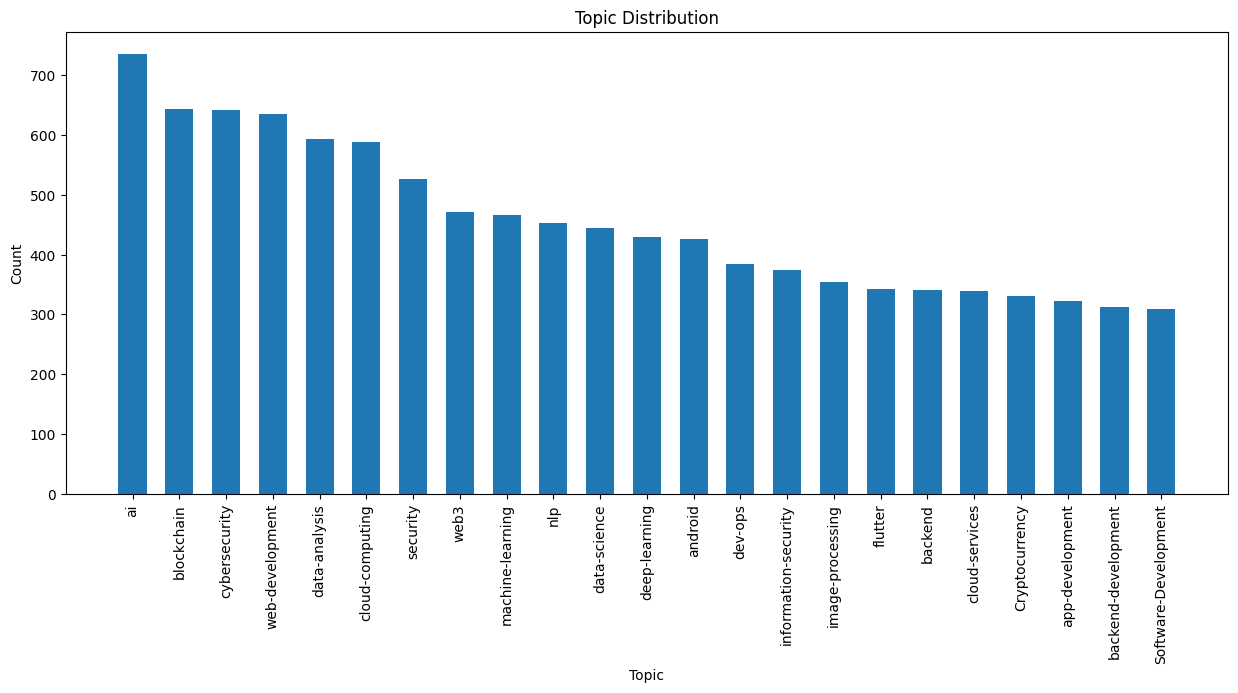

In [16]:
# Visualisasi untuk kolom topic pada dataset blog
showTopicPlot(blog_df)

Pada visualisasi diatas, topik blog yang banyak ditulis adalah ai (artificial inteligence)

<Axes: xlabel='ratings', ylabel='count'>

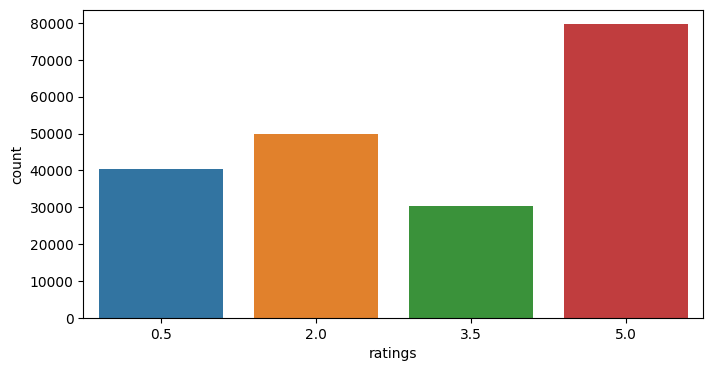

In [17]:
# Visualisasi untuk kolom rating pada dataset ratings
plt.figure(figsize=(8,4))
sns.countplot(x=ratings_df["ratings"])

Rating terbanyak yang diberikan adalah 5

---
# Data Preprocessing

Menghapus kolom yang tidak diperlukan

---

In [18]:
blog_df.drop(['author_id','blog_link','blog_img','scrape_time'],axis='columns',inplace=True)

In [19]:
blog_df

,blog_id,blog_title,blog_content,topic
0,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai
1,3,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai
2,4,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,ai
3,5,The Automated Stable-Diffusion Checkpoint Merg...,Checkpoint merging is powerful. The power of c...,ai
4,6,The Art of Lazy Creativity: My Experience Co-W...,I was feeling particularly lazy one day and co...,ai
...,...,...,...,...
10462,10489,Introducing Qwik — A Superfast JavaScript Fram...,An overview of Qwik’s key features and archite...,web-development
10463,10490,A Beginner’s Guide to Cypress Testing Framewor...,Cypress is a popular JavaScript testing framew...,web-development
10464,10491,How To Use Awaited in TypeScript,Unraveling the magic of Promise handling with ...,web-development
10465,10492,Angular Hydration? WTF is it and why does it m...,How thirsty is your app for better performance...,web-development


In [20]:
# Menghapus blog yang duplikat
blog_df.drop_duplicates(['blog_title','blog_content'],inplace=True)

In [21]:
blog_df

,blog_id,blog_title,blog_content,topic
0,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai
2,4,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,ai
3,5,The Automated Stable-Diffusion Checkpoint Merg...,Checkpoint merging is powerful. The power of c...,ai
4,6,The Art of Lazy Creativity: My Experience Co-W...,I was feeling particularly lazy one day and co...,ai
5,7,LLaMA: Everything you want to know about Meta’...,Facebook’s Parent Company Just Released a Game...,ai
...,...,...,...,...
10462,10489,Introducing Qwik — A Superfast JavaScript Fram...,An overview of Qwik’s key features and archite...,web-development
10463,10490,A Beginner’s Guide to Cypress Testing Framewor...,Cypress is a popular JavaScript testing framew...,web-development
10464,10491,How To Use Awaited in TypeScript,Unraveling the magic of Promise handling with ...,web-development
10465,10492,Angular Hydration? WTF is it and why does it m...,How thirsty is your app for better performance...,web-development


---
# Preprocessing Text Data

Melakukan praproses pada text data untuk menghapus stopwords dari konten blog dan juga menerapkan lemmatization untuk mengembalikan semua kata ke bentuk kata dasar.

---

In [22]:
lst_stopwords=corpus.stopwords.words('english')
def pre_process_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    text=str(text).lower()
    text=text.strip()
    text = re.sub(r'[^\w\s]', '', text)
    lst_text = text.split()
    if lst_stopwords is not None:
        lst_text=[word for word in lst_text if word not in lst_stopwords]
    if flg_lemm:
        lemmatizer = WordNetLemmatizer()
        lst_text = [lemmatizer.lemmatize(word) for word in lst_text]
    if flg_stemm:
        stemmer = PorterStemmer()
        lst_text = [stemmer.stem(word) for word in lst_text]
    text=" ".join(lst_text)
    return text

In [23]:
blog_df['clean_blog_content'] = blog_df['blog_content'].apply(lambda x: pre_process_text(x,flg_stemm=False,flg_lemm=True,lst_stopwords=lst_stopwords))

In [24]:
blog_df

,blog_id,blog_title,blog_content,topic,clean_blog_content
0,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...
2,4,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,ai,applying ai 4 common user research activity us...
3,5,The Automated Stable-Diffusion Checkpoint Merg...,Checkpoint merging is powerful. The power of c...,ai,checkpoint merging powerful power checkpoint m...
4,6,The Art of Lazy Creativity: My Experience Co-W...,I was feeling particularly lazy one day and co...,ai,feeling particularly lazy one day couldnt both...
5,7,LLaMA: Everything you want to know about Meta’...,Facebook’s Parent Company Just Released a Game...,ai,facebooks parent company released gamechanging...
...,...,...,...,...,...
10462,10489,Introducing Qwik — A Superfast JavaScript Fram...,An overview of Qwik’s key features and archite...,web-development,overview qwiks key feature architecture may aw...
10463,10490,A Beginner’s Guide to Cypress Testing Framewor...,Cypress is a popular JavaScript testing framew...,web-development,cypress popular javascript testing framework e...
10464,10491,How To Use Awaited in TypeScript,Unraveling the magic of Promise handling with ...,web-development,unraveling magic promise handling typescript a...
10465,10492,Angular Hydration? WTF is it and why does it m...,How thirsty is your app for better performance...,web-development,thirsty app better performance angular hydrati...


---

# Menggunakan TFIDF Vectorizer to vectorize pada blog topic

TF-IDF, kependekan dari Term Frequency-Inverse Document Frequency, adalah teknik yang banyak digunakan dalam pemrosesan bahasa alami dan pengambilan informasi untuk mengukur pentingnya suatu istilah dalam dokumen dalam kumpulan dokumen. TF-IDF menggabungkan dua faktor: Term Frequency (TF) dan Inverse Document Frequency (IDF).

- **Term Frequency (TF)**: TF mengukur frekuensi istilah dalam dokumen. Ini menghitung berapa kali suatu istilah muncul dalam dokumen dan mewakilinya sebagai hitungan mentah atau nilai yang dinormalisasi. Alasan di balik TF adalah bahwa istilah yang lebih sering muncul dalam dokumen cenderung lebih penting atau relevan dengan dokumen tersebut.

- **Inverse Document Frequency (IDF)**: IDF mengukur signifikansi suatu istilah di seluruh kumpulan dokumen. Ini menghitung logaritma fraksi terbalik dari jumlah dokumen yang mengandung istilah tersebut. Ide di balik IDF adalah bahwa istilah yang muncul di sejumlah kecil dokumen lebih informatif dan berharga daripada istilah yang muncul di sejumlah besar dokumen..

Perhitungan TF-IDF dilakukan dengan mengalikan nilai TF dan IDF secara bersamaan. Skor yang dihasilkan merepresentasikan pentingnya suatu istilah dalam dokumen dalam konteks keseluruhan kumpulan dokumen. Skor yang lebih tinggi menunjukkan bahwa suatu istilah lebih relevan atau berbeda dengan dokumen tertentu.

Rumus perhitungan TF-IDF untuk term (t) dalam dokumen (d) dalam kumpulan dokumen adalah sebagai berikut:
[Gambar](https://ptime.s3.ap-northeast-1.amazonaws.com/media/natural_language_processing/text_feature_Engineering/tf-idf-formula.PNG)


In [25]:
tfidf_vecotorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vecotorizer.fit_transform(blog_df['topic'])
print(tfidf_matrix.shape)

(10466, 28)


Oleh karena itu, ada 28 kata atau vektor unik yang digunakan untuk mendeskripsikan total 10467 blog yang kami miliki dalam kumpulan data

In [26]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan topic blog
# Baris diisi dengan judul blog

tfid_example = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf_vecotorizer.get_feature_names_out(),
    index=blog_df.blog_title
).sample(22, axis=1).sample(10, axis=0)

tfid_example

,data,learning,ops,deep,backend,development,web3,computing,blockchain,security,...,processing,ai,app,android,information,cybersecurity,software,analysis,cloud,nlp
blog_title,,,,,,,,,,,,,,,,,,,,,
The rise of AI influencers: are virtual influencers like ‘Lil Miquela’ the future of social media?,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0
$10.000 bounty for exposed .git to RCE,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
FeathersJS vs NestJS — Compared in 3 Key Areas,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Comeback 101: The Sales Force,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.749646,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.661839,0.0
Choosing the Best Approach to Building an NLP-Based Text Recommendation System,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0
Experience the Motion,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Introduction to Web Development,0.0,0.0,0.0,0.0,0.000000,0.538923,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.842355,0.0,0.000000,0.0
How to create Rest API in Dart?,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Data Viz Storytelling with a Data Science Twist,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0


---
# Content Based Filtering berdasarkan topik blog

Kesamaan kosinus adalah ukuran yang digunakan untuk menentukan kesamaan antara dua vektor dalam ruang multidimensi. Ini menghitung cosinus sudut antara vektor, yang menunjukkan seberapa dekat hubungan vektor dalam hal orientasi dan arahnya.

Berikut adalah rumus untuk menghitung cosinus similarity,

[link text](https://clay-atlas.com/wp-content/uploads/2020/03/cosine-similarity.png)

Ini akan mengembalikan seberapa mirip dua vektor berdasarkan jarak di antara keduanya. Nilai ini berkisar dari 0 hingga 1 . Di mana 0 mewakili konten yang paling tidak mirip dan 1 konten yang paling mirip. Ini adalah metode yang sangat banyak digunakan dan efisien untuk membangun sistem rekomendasi berbasis konten. Itulah satu-satunya alasan kami menggunakannya untuk membangun sistem rekomendasi blog kami.

---

In [27]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul blog
cosine_sim_df = pd.DataFrame(cosine_sim, index=blog_df.blog_title, columns=blog_df.blog_title)

In [28]:
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

blog_title,Exploring the Importance of API Security,Linkerd vs Istio: A Comprehensive Comparison of Service Mesh Solutions,Protect Your Website from Common Attacks with a WAF Solution,The 5 Most Active Blockchains,🤖📈 How TweetHunter Used NLP to Build a Successful Startup 🚀
blog_title,,,,,
Public Technology Live — Future-proofing the Digital and Tech Talent Pipeline,0.0,1.0,0.0,0.0,0.0
How I Think Through Cryptocurrency Taxes in 2023,0.0,0.0,0.0,0.0,0.0
Challenges Turned Learning Opportunities (A Short Story),0.0,0.0,0.0,0.0,0.0
From Zero to App: A Relentless Journey of Creating Pairy,0.0,0.0,0.0,0.0,0.0
What’s KOTLIN? Modern Lang better than Java?,0.0,0.0,0.0,0.0,0.0
I tried Google’s Bard. Here’s why ChatGPT is still the Best.,0.0,0.0,0.0,0.0,0.0
Sharing Our Cloud Journey at AWS re:Invent,0.0,0.0,0.0,0.0,0.0
Cross-platform App Development,0.0,0.0,0.0,0.0,0.0
05 High-Demand IT Jobs of the Future You Need to Know About,0.0,0.0,0.0,0.0,0.0


---
# Euclidean Distance

Euclidean distance mengidentifikasi seberapa jauh dua vektor terpisah satu sama lain. Artinya dia melihat jarak kedekatan antara dua teks.

---


In [29]:
# Menghitung euclidean distance pada matrix tf-idf
euclidean_dist = euclidean_distances(tfidf_matrix)
# Membuat dataframe dari variabel euclidean_dist dengan baris dan kolom berupa judul blog
euclidean_dist_df = pd.DataFrame(euclidean_dist, index=blog_df.blog_title, columns=blog_df.blog_title)

In [30]:
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

blog_title,People Detection with HOG Algorithm in Python,Image Compression: How It Works and Why It Matters,A/B Testing in Statistics: Everything You Need to Know,Un laboratorio di federated learning per la pediatria,Camera Response Functions
blog_title,,,,,
How to run C++ code from a native Android or iOS app,0.0,0.0,0.000000,0.00000,0.0
"Russian Cybercrime Gang Busted by FBI, EU, and Ukrainian Police",0.0,0.0,0.000000,0.00000,0.0
Industry specific DWH architecture,0.0,0.0,0.000000,0.00000,0.0
The Role of Ensemble Methods in Machine Learning,0.0,0.0,0.000000,0.40964,0.0
Awaken Your Inner Potential,0.0,0.0,0.000000,0.00000,0.0
Unleashing the Potential of Histogram Segmentation for Image Segmentation”,1.0,1.0,0.000000,0.00000,1.0
Metabit’s attendance at Eth Denver,0.0,0.0,0.000000,0.00000,0.0
ChatGPT: A Simple Explanation of Its Technicalities,0.0,0.0,0.000000,0.00000,0.0
Android | Fragment lifecycle,0.0,0.0,0.000000,0.00000,0.0


In [32]:
def blog_recommendations(blog_title, similarity_data=cosine_sim_df, similar_type='cosine',
                         items=blog_df[['blog_title','topic','clean_blog_content']], k=10):


    """
    Rekomendasi Blog berdasarkan kemiripan dataframe

    Parameter:
    ---
    title : tipe data string (str)
                Title movie (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan Blog sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)

    # Mengambil data dengan similarity terbesar (cosine) dan terkecil (euclidean) dari index yang ada
    if (similar_type == 'cosine'):
        index = similarity_data.loc[:,blog_title].to_numpy().argpartition(
        range(-1, -k, -1))
        # Mengambil data dengan similarity terbesar dari index yang ada
        closest = similarity_data.columns[index[-1:-(k+2):-1]]
        score = similarity_data.iloc[index[-1:-(k+2):-1],
                                     similarity_data.columns.get_loc(title)
                                    ].reset_index(drop=True)
    else:
        index = similarity_data.loc[:,blog_title].to_numpy().argpartition(
        range(k+1))
        # Mengambil data dengan similarity terbesar dari index yang ada
        closest = similarity_data.columns[index[:(k+2)]]
        score = similarity_data.iloc[index[:(k+2)],
                                     similarity_data.columns.get_loc(title)
                                    ].reset_index(drop=True)


    # Drop blog_title agar nama blog yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(blog_title, errors='ignore')
    result = pd.DataFrame(closest).merge(items).head(k)
    result['score'] = score

    return result

In [34]:
title = 'Relation between cloud computing and artificial intelligence'

blog_df[blog_df.blog_title.eq(title)]

,blog_id,blog_title,blog_content,topic,clean_blog_content
2628,2655,Relation between cloud computing and artificia...,Cloud computing is a fairly new service that o...,cloud-services,cloud computing fairly new service organizatio...


In [35]:
blog_name = input('Apa blog yang kamu suka ?')
df2 = cosine_sim_df.filter(regex=blog_name)
column_headers = list(df2.columns.values)
for i in column_headers :
  print(i)
choosen_blog = input("Tuliskan judul blog yang kamu suka :")
print ('Inilah beberapa rekomendasi blog yang kamu suka:')
# default similarity data consine
blog_recommendations(choosen_blog, similarity_data=cosine_sim_df, similar_type='cosine')

Apa blog yang kamu suka ?Relation between cloud computing and artificial intelligence
Relation between cloud computing and artificial intelligence
Tuliskan judul blog yang kamu suka :Relation between cloud computing and artificial intelligence
Inilah beberapa rekomendasi blog yang kamu suka:


,blog_title,topic,clean_blog_content,score
0,Cloud Databases: Modern Approach in IT. Part 1...,cloud-services,almost technology project requires database th...,1.0
1,Cloud Services : SaaS vs PaaS vs IaaS vs STaaS...,cloud-services,quick guide understanding different type cloud...,1.0
2,How to create your first AWS EKS cluster using...,cloud-services,running software container environment like aw...,1.0
3,Getting started with Cloud Computing,cloud-services,cloud computing cloud computing model deliveri...,1.0
4,A Beginner’s Guide To Cloud,cloud-services,find extensive list definition across platform...,1.0
5,Why I recommend everyone to dump torrent clien...,cloud-services,hi today reviewing seedr website allows downlo...,1.0
6,Open-source Data Tools will provide a way out ...,cloud-services,need know use production many business acquire...,1.0
7,"ECS Deep Dive, why does this container orchest...",cloud-services,im working startup first priority minimize ope...,1.0
8,🏈 Happy Super Bowl! Share The Winning Team in ...,cloud-services,football fan day come two best team compete fa...,1.0
9,Securing the Cloud: Best Practices for Protect...,cloud-services,article talk best practice securing cloud prot...,1.0


In [36]:
title = 'Relation between cloud computing and artificial intelligence'

blog_df[blog_df.blog_title.eq(title)]

,blog_id,blog_title,blog_content,topic,clean_blog_content
2628,2655,Relation between cloud computing and artificia...,Cloud computing is a fairly new service that o...,cloud-services,cloud computing fairly new service organizatio...


In [37]:
blog_name = input('Apa blog yang kamu suka ?')
df2 = cosine_sim_df.filter(regex=blog_name)
column_headers = list(df2.columns.values)
for i in column_headers :
  print(i)
choosen_blog = input("Tuliskan judul blog yang kamu suka :")
print ('Inilah beberapa rekomendasi blog yang kamu suka:')
# default similarity data consine
blog_recommendations(choosen_blog, similarity_data=euclidean_dist_df, similar_type='euclidean')

Apa blog yang kamu suka ?Relation between cloud computing and artificial intelligence
Relation between cloud computing and artificial intelligence
Tuliskan judul blog yang kamu suka :Relation between cloud computing and artificial intelligence
Inilah beberapa rekomendasi blog yang kamu suka:


,blog_title,topic,clean_blog_content,score
0,Amazon DevOps Guru,cloud-services,guru devops became one fastest methodology get...,0.0
1,Multicloud Strategy!,cloud-services,whats multicloud organization opting multiclou...,0.0
2,Using Cloudinary Gem with Ruby on Rails,cloud-services,youre ready push rail app heroku everything go...,0.0
3,Using API Gateway with Lambda to Send a Messag...,cloud-services,api gateway provide unified entry point across...,0.0
4,Using LiteFS with Bun on Fly.io,cloud-services,neither bun litefs recommended production yet ...,0.0
5,What is Azure Sentinel,cloud-services,introduction cybersecurity evergrowing concern...,0.0
6,Why is the service mesh a critical component o...,cloud-services,introduction cloudnative environment becoming ...,0.0
7,Eight Critical Success Factors for Cloud Migra...,cloud-services,migrating cloud requires substantial time comm...,0.0
8,Cloud Computing ☁️☁️,cloud-services,youre seeking expand knowledge cloud computing...,0.0
9,ZenDesk vs. Salesforce Service Cloud: A Compar...,cloud-services,delivering exceptional customer service choosi...,0.0


Model berhasil memberikan rekomendasi 10 judul blog dengan topic yang sama seperti yang disukai, yaitu cloud-services.

---
#Collaborative Filtering

---

In [ ]:
blog_all = pd.merge(blog_df, ratings_df, on='blog_id', suffixes=['', '_user'])
blog_all

,blog_id,blog_title,blog_content,topic,clean_blog_content,userId,ratings
0,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...,624,2.0
1,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...,1256,0.5
2,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...,2095,3.5
3,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...,2103,5.0
4,1,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,hello fam youve u since 2021 probably remember...,2286,2.0
...,...,...,...,...,...,...,...
200125,9755,Embracing the Magic of Scrum,"Recently, I started to develop website aspirin...",Software-Development,recently started develop website aspiringit un...,4580,0.5
200126,9755,Embracing the Magic of Scrum,"Recently, I started to develop website aspirin...",Software-Development,recently started develop website aspiringit un...,4649,5.0
200127,9755,Embracing the Magic of Scrum,"Recently, I started to develop website aspirin...",Software-Development,recently started develop website aspiringit un...,4773,5.0
200128,9755,Embracing the Magic of Scrum,"Recently, I started to develop website aspirin...",Software-Development,recently started develop website aspiringit un...,4829,2.0


Selanjutnya akan dilakukan konversi data dari data series menjadi list dan akan dilakukan encode pada kolom userId dan blog_id dan akan dilakukan mapping terhadap dua kolom tersebut

In [ ]:
# Mengubah userId menjadi list
user_id = blog_all['userId'].unique().tolist()
print('list userId: ', user_id)

# Encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
print('encoded userId : ', user_to_user_encoded)

# Encoding angka ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}

print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [624, 1256, 2095, 2103, 2286, 2686, 2927, 4052, 4544, 4904, 44, 148, 1486, 2001, 2229, 2299, 2600, 3895, 4002, 4244, 4267, 4896, 11, 560, 754, 1569, 1747, 2744, 883, 1232, 1592, 2648, 2743, 3970, 4871, 14, 566, 1245, 1567, 2898, 3158, 3933, 4372, 4415, 4613, 4907, 359, 955, 1099, 1765, 1857, 1891, 2427, 2994, 3060, 268, 919, 931, 2852, 4635, 4960, 269, 381, 881, 2172, 2510, 4311, 316, 628, 819, 2522, 3409, 3754, 4196, 4228, 4815, 1000, 1557, 1880, 2857, 3845, 4219, 4938, 1894, 2596, 4227, 4319, 358, 2126, 3927, 4795, 3238, 3996, 1647, 3993, 4788, 1914, 3140, 4272, 4439, 1002, 2656, 3195, 3322, 4191, 1276, 519, 1019, 3701, 4282, 4797, 331, 452, 595, 1889, 2465, 3164, 763, 1303, 1356, 3008, 3252, 29, 2308, 4225, 4637, 792, 1573, 4049, 4631, 115, 845, 1225, 2520, 4558, 3449, 1848, 3400, 85, 493, 498, 1290, 1699, 1955, 2138, 2362, 2487, 3018, 3176, 3277, 3293, 3578, 3679, 3742, 3781, 4858, 4977, 24, 88, 249, 525, 546, 693, 1165, 1278, 1431, 1901, 2393, 2424, 2956, 3553, 3876,

In [ ]:
# Mengubah blog_id menjadi list
blog_id = blog_all['blog_id'].unique().tolist()
print('list blog_id: ', blog_id)

# Encoding blog_id
blog_to_blog_encoded = {x: i for i, x in enumerate(blog_id)}
print('encoded blog_id : ', blog_to_blog_encoded)

# Encoding angka ke blog_id
blog_encoded_to_blog = {i: x for i, x in enumerate(blog_id)}

print('encoded angka ke blog_id: ', blog_encoded_to_blog)

list blog_id:  [1, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 

---
# Modelling

Untuk sistem rekomendasi content based filtering akan digunakan cosine similarity dan euclidean distance untuk menentukan kemiripan antar item yang nantinya bisa direkomendasikan kepada user yang juga melihat item tersebut.

Untuk sistem rekomendasi collaborative filtering akan digunakan deep learning yang akan melakukan train data dan menampilkan rekomendasi untuk satu user.


---

In [ ]:
# Mapping userId ke dataframe user
blog_all['user'] = blog_all['userId'].map(user_to_user_encoded)

# Mapping blog_id ke dataframe blog
blog_all['blog'] = blog_all['blog_id'].map(blog_to_blog_encoded)

Melakukan cek jumlah user, blog, dan mengubah tipe data rating menjadi float

In [ ]:
# Mendapatkan jumlah user
num_user = len(user_to_user_encoded)

# Mendapatkan jumlah blog
num_blog = len(blog_encoded_to_blog)

# Mengubah rating menjadi nilai float
blog_all['ratings'] = blog_all['ratings'].values.astype(np.float32)
blog_all['blog'] = blog_all['blog'].values.astype(np.int64)
blog_all['user'] = blog_all['user'].values.astype(np.int64)

# Nilai minimum rating
min_rating = min(blog_all['ratings'])

# Nilai maksimal rating
max_rating = max(blog_all['ratings'])

print('Jumlah User: {}, Jumlah Blog: {}, Min Rating: {}, Max Rating: {}, '.format(
    num_user, num_blog, min_rating, max_rating,
))

Jumlah User: 5001, Jumlah Blog: 9705, Min Rating: 0.5, Max Rating: 5.0, 


In [ ]:
blog_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200130 entries, 0 to 200129
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   blog_id             200130 non-null  int64  
 1   blog_title          200130 non-null  object 
 2   blog_content        200130 non-null  object 
 3   topic               200130 non-null  object 
 4   clean_blog_content  200130 non-null  object 
 5   userId              200130 non-null  int64  
 6   ratings             200130 non-null  float32
 7   user                200130 non-null  int64  
 8   blog                200130 non-null  int64  
dtypes: float32(1), int64(4), object(4)
memory usage: 14.5+ MB


Selanjutnya dilakukan shuffle data agar distribusinya menjadi random

In [ ]:
blog_all = blog_all.sample(frac=1, random_state=42)
blog_all

,blog_id,blog_title,blog_content,topic,clean_blog_content,userId,ratings,user,blog
149695,8501,Why NodeJS is the Top Choice for Scalable and ...,NodeJS is a popular open-source framework that...,app-development,nodejs popular opensource framework allows dev...,2772,5.0,4763,8453
49071,2883,The Use of Java In Backend Development,Introduction Programmers often get confused wh...,backend-development,introduction programmer often get confused cho...,128,5.0,326,2849
16800,1092,Web 3 Industry,Part 11 Emillion Reality journalism of the “Ta...,web3,part 11 emillion reality journalism talent web...,1434,3.5,1522,1064
190277,9534,Go Packages and Modules: Building Reusable and...,As software development projects grow in size ...,Software-Development,software development project grow size complex...,2783,2.0,2660,9484
71320,4228,SupraOracles partners with Syscoin to build in...,SupraOracles is excited to announce its partne...,blockchain,supraoracles excited announce partnership sysc...,1035,3.5,1187,4191
...,...,...,...,...,...,...,...,...,...
119879,7191,Guidance for AWS Certifications,What is AWS? It is a comprehensive cloud compu...,cloud-computing,aws comprehensive cloud computing platform pro...,133,5.0,915,7146
103694,6173,Using Transformer Reinforcement Learning to De...,Have you ever noticed that language models som...,nlp,ever noticed language model sometimes generate...,4433,0.5,3168,6131
131932,8004,Top 20 Companies for Android App Development i...,Have you thought about creating a mobile app i...,android,thought creating mobile app consideration app ...,1350,0.5,837,7958
146867,8433,Help App Users See Value Quickly,Ten-Pin Bowling plays with our emotions. On th...,app-development,tenpin bowling play emotion one hand knocking ...,2753,2.0,4317,8386


Melakukan inisialisasi untuk variabel x dan variabel y dan membagi data dengan proporsi 80%:20%

In [ ]:
x = blog_all[['user', 'blog']].values
y = blog_all['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * blog_all.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)
print(x, y)

[[4763 8453]
 [ 326 2849]
 [1522 1064]
 ...
 [ 837 7958]
 [4317 8386]
 [ 944 7366]] [1.         1.         0.66666667 ... 0.         0.33333333 1.        ]
[[4763 8453]
 [ 326 2849]
 [1522 1064]
 ...
 [ 837 7958]
 [4317 8386]
 [ 944 7366]] [1.         1.         0.66666667 ... 0.         0.33333333 1.        ]


Membuat model deep learning untuk melakukan training data sistem rekomendasi collaborative filtering

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_user, num_blog, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_user = num_user
    self.num_blog = num_blog
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embeddings user
        num_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_user, 1) # layer embedding user bias

    self.blog_embedding = layers.Embedding( # layer embeddings blog
        num_blog,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.blog_bias = layers.Embedding(num_blog, 1) # layer embedding blog bias'

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    blog_vector = self.blog_embedding(inputs[:, 1]) # memanggil layer embedding 3
    blog_bias = self.blog_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_blog = tf.tensordot(user_vector, blog_vector, 2)

    x = dot_user_blog  + user_bias + blog_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
# inisialisasi model RecommenderNet
model = RecommenderNet(num_user, num_blog, 100)

# Compile Model RecommenderNet
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model RecommenderNet menggunakan binary crossentropy untuk meminimalkan loss, Adam sebagai fungsi optimisasinya dan menggunakan mean absolute error (MAE) dan Root Mean Squared Error (RMSE) sebagai metrik evaluasinya.

In [ ]:
#Melakukan inisialisasi callbacks untuk model
callbacks = EarlyStopping(
    monitor ='val_root_mean_squared_error' ,
    mode='min',
    patience=1,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 1024,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/100
157/157 [==============================] - 12s 38ms/step - loss: 0.6948 - root_mean_squared_error: 0.4021 - val_loss: 0.6957 - val_root_mean_squared_error: 0.4027
Epoch 2/100
157/157 [==============================] - 6s 39ms/step - loss: 0.7089 - root_mean_squared_error: 0.4088 - val_loss: 0.6962 - val_root_mean_squared_error: 0.4030


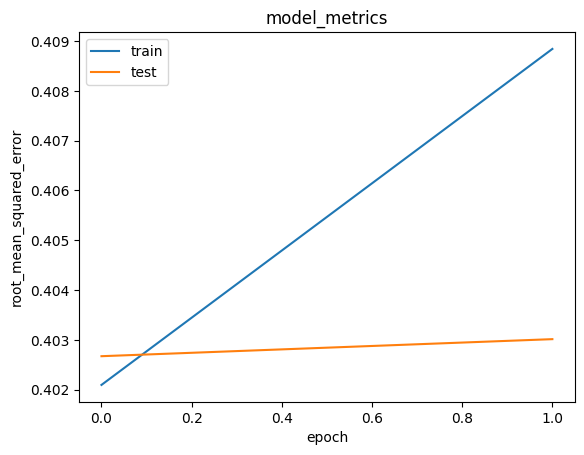

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# inisialisasi model RecommenderNet
model_rms = RecommenderNet(num_user, num_blog, 100)

# Compile Model RecommenderNet
model_rms.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.optimizers.RMSprop(1e-4),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history_rms = model_rms.fit(
    x = x_train,
    y = y_train,
    batch_size = 1024,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/100
157/157 [==============================] - 6s 31ms/step - loss: 0.6944 - root_mean_squared_error: 0.4018 - val_loss: 0.6970 - val_root_mean_squared_error: 0.4035
Epoch 2/100
157/157 [==============================] - 4s 23ms/step - loss: 0.6860 - root_mean_squared_error: 0.3964 - val_loss: 0.6971 - val_root_mean_squared_error: 0.4036


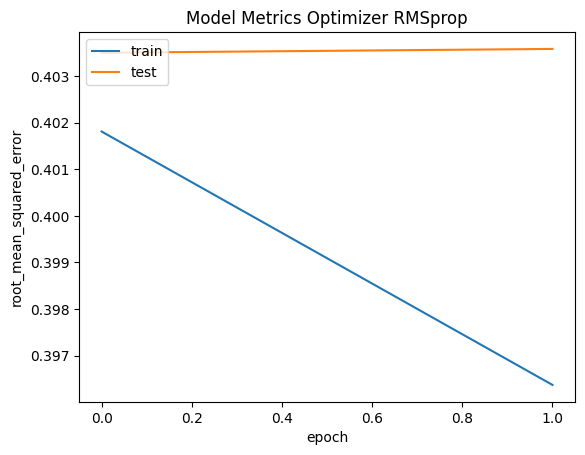

In [ ]:
plt.plot(history_rms.history['root_mean_squared_error'])
plt.plot(history_rms.history['val_root_mean_squared_error'])
plt.title('Model Metrics Optimizer RMSprop')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

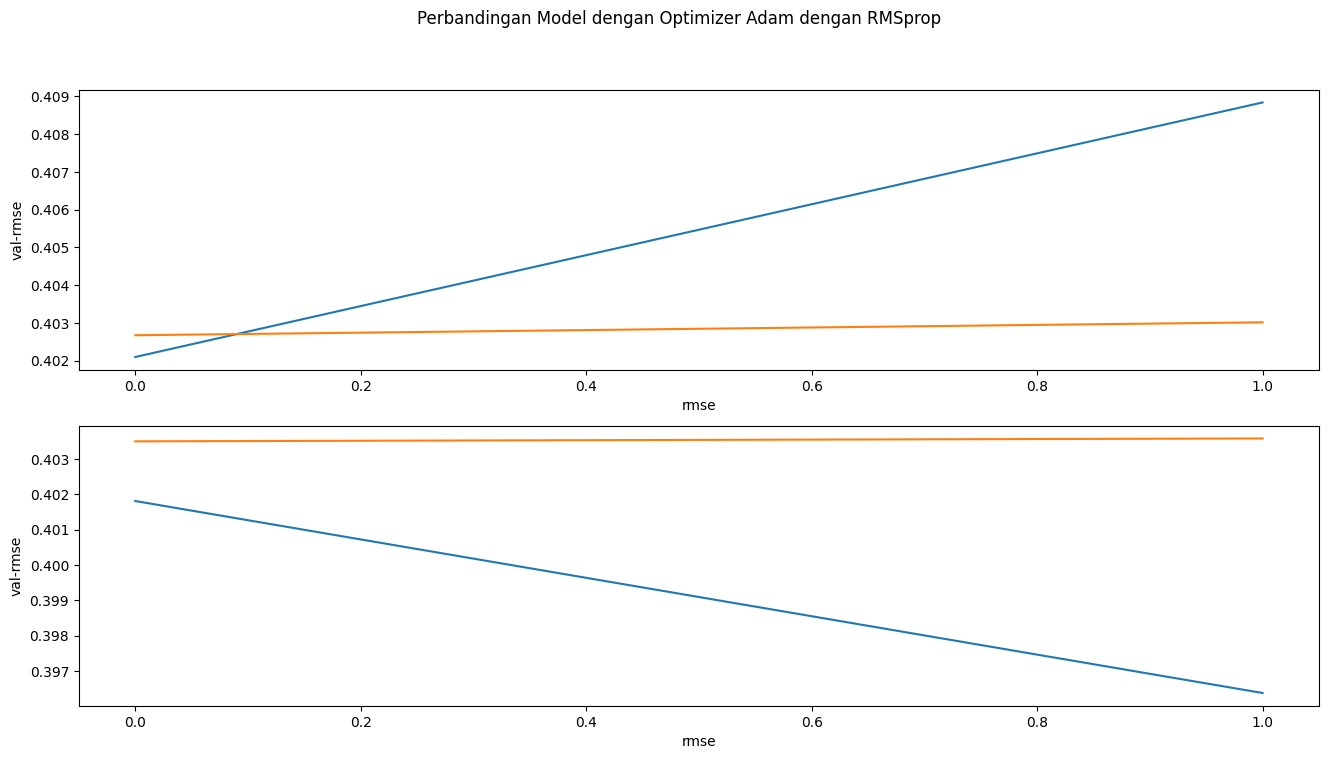

In [ ]:
fig, ax = plt.subplots(2, figsize=(16, 8))

mt1 = history.history['root_mean_squared_error']
mv1 = history.history['val_root_mean_squared_error']
mt2 = history_rms.history['root_mean_squared_error']
mv2 = history_rms.history['val_root_mean_squared_error']

ax[0].plot(mt1)
ax[0].plot(mv1)

ax[1].plot(mt2)
ax[1].plot(mv2)

for plot in ax.flat:
    plot.set(xlabel='rmse', ylabel='val-rmse')

plt.suptitle("Perbandingan Model dengan Optimizer Adam dengan RMSprop")

plt.show()

In [ ]:
# Mengambil sample user
user_id = blog_all.userId.sample(1).iloc[0]
blog_read_by_user = blog_all[blog_all.userId == user_id]

# Operator bitwise
blog_not_read = blog_all[~blog_all['blog_id'].isin(blog_read_by_user.blog_id.values)]['blog_id']
blog_not_read = list(
    set(blog_not_read)
    .intersection(set(blog_to_blog_encoded.keys()))
)

blog_not_read = [[blog_to_blog_encoded.get(x)] for x in blog_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_blog_array = np.hstack(
    ([[user_encoder]] * len(blog_not_read), blog_not_read)
)

In [ ]:
ratings = model.predict(user_blog_array).flatten()

# top rating
top_ratings_indices = ratings.argsort()[-10:][::-1]

# rekomendasi blog
recommended_blog_ids = [
    blog_encoded_to_blog.get(blog_not_read[x][0]) for x in top_ratings_indices
]

print('Menampilkan rekomendasi untuk user: {}'.format(user_id))
print('==' * 20)
print('blog dengan peringkat tinggi dari user')
print('--' * 20)

# mencari rekomendasi blog berdasarkan rating yang diberikan user
top_blog_user = (
    blog_read_by_user.sort_values(
        by = 'ratings',
        ascending=False
    )
    .head(5)
    .blog_id.values
)

df_blog_rows = blog_df[blog_df['blog_id'].isin(top_blog_user)]
for idx, row in enumerate(df_blog_rows.itertuples(index=False), start=1):
    print("{}. Title Blog:".format(idx), row[1])
    print("   Topic:", row[3])
    print()

print('--' * 20)
print('10 rekomendasi blog teratas')
print('--' * 20)

# rekomendasi blog
blog_top10 = blog_df[blog_df['blog_id'].isin(recommended_blog_ids)]

# fungsi perulangan untuk menampilkan rekomendasi blog dan topic sebanyak 10 buah
for idx, row in enumerate(blog_top10.itertuples(index=False), start=1):
    print("{}. Title Blog:".format(idx), row[1])
    print("   Topic:", row[3])
    print()


302/302 [==============================] - 1s 1ms/step
Menampilkan rekomendasi untuk user: 71
blog dengan peringkat tinggi dari user
----------------------------------------
1. Title Blog: Kotlin loop best practice with example
   Topic: android

2. Title Blog: 5 Reasons You Should Buy An Android Phone Even If You’re A Die Hard iPhone User
   Topic: android

3. Title Blog: How To Use Fetch API and Redux in a React Native Functional Component:[Android]
   Topic: android

4. Title Blog: Make Gradle Dependencies Management better
   Topic: android

5. Title Blog: From Shared Preferences to SQLite: Understanding Data Persistence in Flutter
   Topic: flutter

----------------------------------------
10 rekomendasi blog teratas
----------------------------------------
1. Title Blog: The Power of Python’s Frequency Aggregation: Unlocking Valuable Insights from Your Data
   Topic: data-analysis

2. Title Blog: Beginners guide to data analysis using Python. Part 2
   Topic: data-analysis

3. Ti

# Model Evaluation

In [ ]:
model.save('saved_model/my_model')